<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/normality_analysis/01_workshop_normality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

import warnings

# **Data**
---
- Contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo !Kung San, que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.


In [3]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Howell1.csv'
data = pd.read_csv(url)

- No hay valores nulos
- Todas las variables son cuantitativas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


- Acorde al instructor, se debe seleccionar los hombres mayores de 15 años

In [5]:
data_male = data[(data.age>15) & (data.male==0)]
peso = data_male['weight']

# **Se va a analizar la normalidad del peso**

---



# **Métodos gráficos**
---

In [8]:
# Histograma + curva normal teorica
# - La distribución tiene una desviación con respecto a la media, posiblemente sea por las unidades
mu, sigma = stats.norm.fit(peso)
mu, sigma

(41.38615752272728, 5.737813252284781)

In [11]:
# Valores teóricos de la normal en el rango observado => Formula de la estandarización
x_hat = np.linspace(min(peso), max(peso), num = 100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

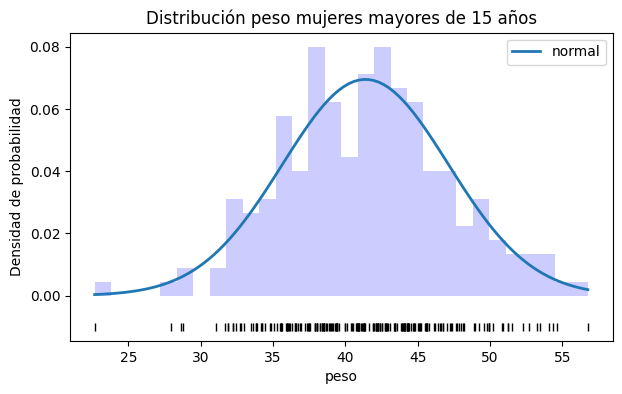

In [12]:
fig, ax = plt.subplots(figsize = (7, 4))
ax.plot(x_hat, y_hat, linewidth = 2, label = 'normal')
ax.hist(x = peso, density=True, bins=30, color='blue', alpha = 0.2)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

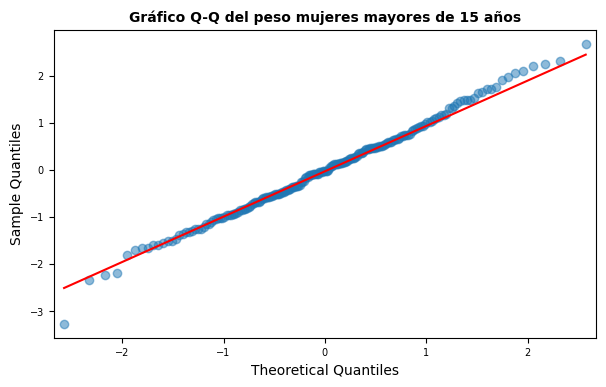

In [22]:
fig, ax = plt.subplots(figsize = (7,4))

sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.5,
    lw    = 2,
    ax    = ax
)

ax.set_title(
    'Gráfico Q-Q del peso mujeres mayores de 15 años',
    fontsize = 10,
    fontweight = "bold")
ax.tick_params(labelsize = 7)

- El análisis gráfico parece indicar que los datos siguen una distribución normal.


# **Métodos analíticos asimetría y curtosis**
---
 Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.


In [24]:
print('Kursotis:', stats.kurtosis(peso))
print('Simetria:', stats.skew(peso))

Kursotis: 0.05524614843093856
Simetria: 0.032122514283202334


- La distribución está normalizada

# **Contraste de hipótesis**
---



In [26]:
# Shapiro-Wilk test
# ShapiroResult(statistic, pvalue)
shapiro_test = stats.shapiro(peso)
print(f'p-value = {shapiro_test}')

p-value = ShapiroResult(statistic=0.9963728785514832, pvalue=0.9239885807037354)


In [27]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(peso)
print(f'Estadístico = {k2}, p-value = {p_value}')

Estadístico = 0.19896549779904893, p-value = 0.9053055672511008


Ninguno de los metodos, muestra evidencias significativa para rechazar la hipotesis nula, por lo tanto los datos se distribuyen de forma normal, puesto que p-value es aproximadamente a 1.